In [139]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [140]:
data = pd.read_csv('/kaggle/input/earthquake-database/database.csv')

In [141]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [142]:
data = data.drop(data.loc[:,data.isnull().mean() > 0.3],axis=1)

In [143]:
data = data.drop('ID',axis=1)

In [144]:
data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())

In [145]:
data = data.dropna(axis=0)

In [146]:
data.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [147]:
{col : data[col].unique() for col in data.columns if data[col].dtypes == 'object'}

{'Date': array(['01/02/1965', '01/04/1965', '01/05/1965', ..., '12/28/2016',
        '12/29/2016', '12/30/2016'], dtype=object),
 'Time': array(['13:44:18', '11:29:49', '18:05:58', ..., '12:38:51', '22:30:19',
        '20:08:28'], dtype=object),
 'Type': array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
       dtype=object),
 'Magnitude Type': array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', 'MWB', 'MWW', 'MWR'],
       dtype=object),
 'Source': array(['ISCGEM', 'ISCGEMSUP', 'OFFICIAL', 'CI', 'US', 'NC', 'GCMT', 'UW',
        'NN', 'SE', 'AK', 'PR'], dtype=object),
 'Location Source': array(['ISCGEM', 'CI', 'US', 'H', 'U', 'G', 'NC', 'B', 'GCMT', 'AG', 'UW',
        'SPE', 'HVO', 'BRK', 'AGS', 'PGC', 'BOU', 'SLC', 'OTT', 'AEI',
        'AEIC', 'CASC', 'ISK', 'ATH', 'THE', 'ROM', 'MDD', 'WEL', 'GUC',
        'UNM', 'CSEM', 'RSPR', 'JMA', 'NN', 'CAR', 'SJA', 'TEH', 'BEO',
        'UCR', 'SE', 'TUL', 'TAP', 'THR', 'LIM', 'US_WEL', 'AK', 'PR'],
       dtype=object),
 '

In [148]:
#later 
data = data.drop([3378,7512,20650],axis=0).reset_index(drop=True)
data['Year'] = data['Date'].apply(lambda x : x[-4:]).astype(np.int)
data['Month'] = data['Date'].apply(lambda x : x[0:2]).astype(np.int)
data['Hour'] = data['Time'].apply(lambda x: x[0:2]).astype(np.int)
data = data.drop(['Date','Time'],axis=1)

/tmp/ipykernel_32/3642644996.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Year'] = data['Date'].apply(lambda x : x[-4:]).astype(np.int)
/tmp/ipykernel_32/3642644996.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information

In [149]:
#data[data['Date'].str.contains('Z')].index

In [150]:
binary_fet = ['Status']
nominal_fet = ['Type','Magnitude Type','Magnitude Source','Location Source','Source']
nominal_prefix = ['T_','MT_','MS_' , 'L_','S_']

In [151]:
for col , prefix in zip(nominal_fet,nominal_prefix):
    dummie = pd.get_dummies(data[col],prefix=prefix).astype(np.int)
    data = pd.concat([data,dummie],axis=1)
    data = data.drop(col,axis=1)

/tmp/ipykernel_32/1219617272.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dummie = pd.get_dummies(data[col],prefix=prefix).astype(np.int)
/tmp/ipykernel_32/1219617272.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
De

In [152]:
data['Status'] = data['Status'].apply(lambda x: 1 if x =='Reviewed' else 0)

In [153]:
y = data['Status']
x = data.drop('Status',axis=1)

In [154]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [155]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.75,random_state=7)

In [160]:
x.shape
#y.mean() > 0.6

(23406, 104)

In [183]:
inputs = tf.keras.Input(shape = (104,))
x = tf.keras.layers.Dense(256,activation='relu')(inputs)
x = tf.keras.layers.Dense(256,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs , outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [
        'Accuracy',
        tf.keras.metrics.AUC(name='auc')
 
    ]
)
epochs = 20
    
hist = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size = 64,
    epochs = epochs,
    callbacks=tf.keras.callbacks.ReduceLROnPlateau(),
    verbose=0
)

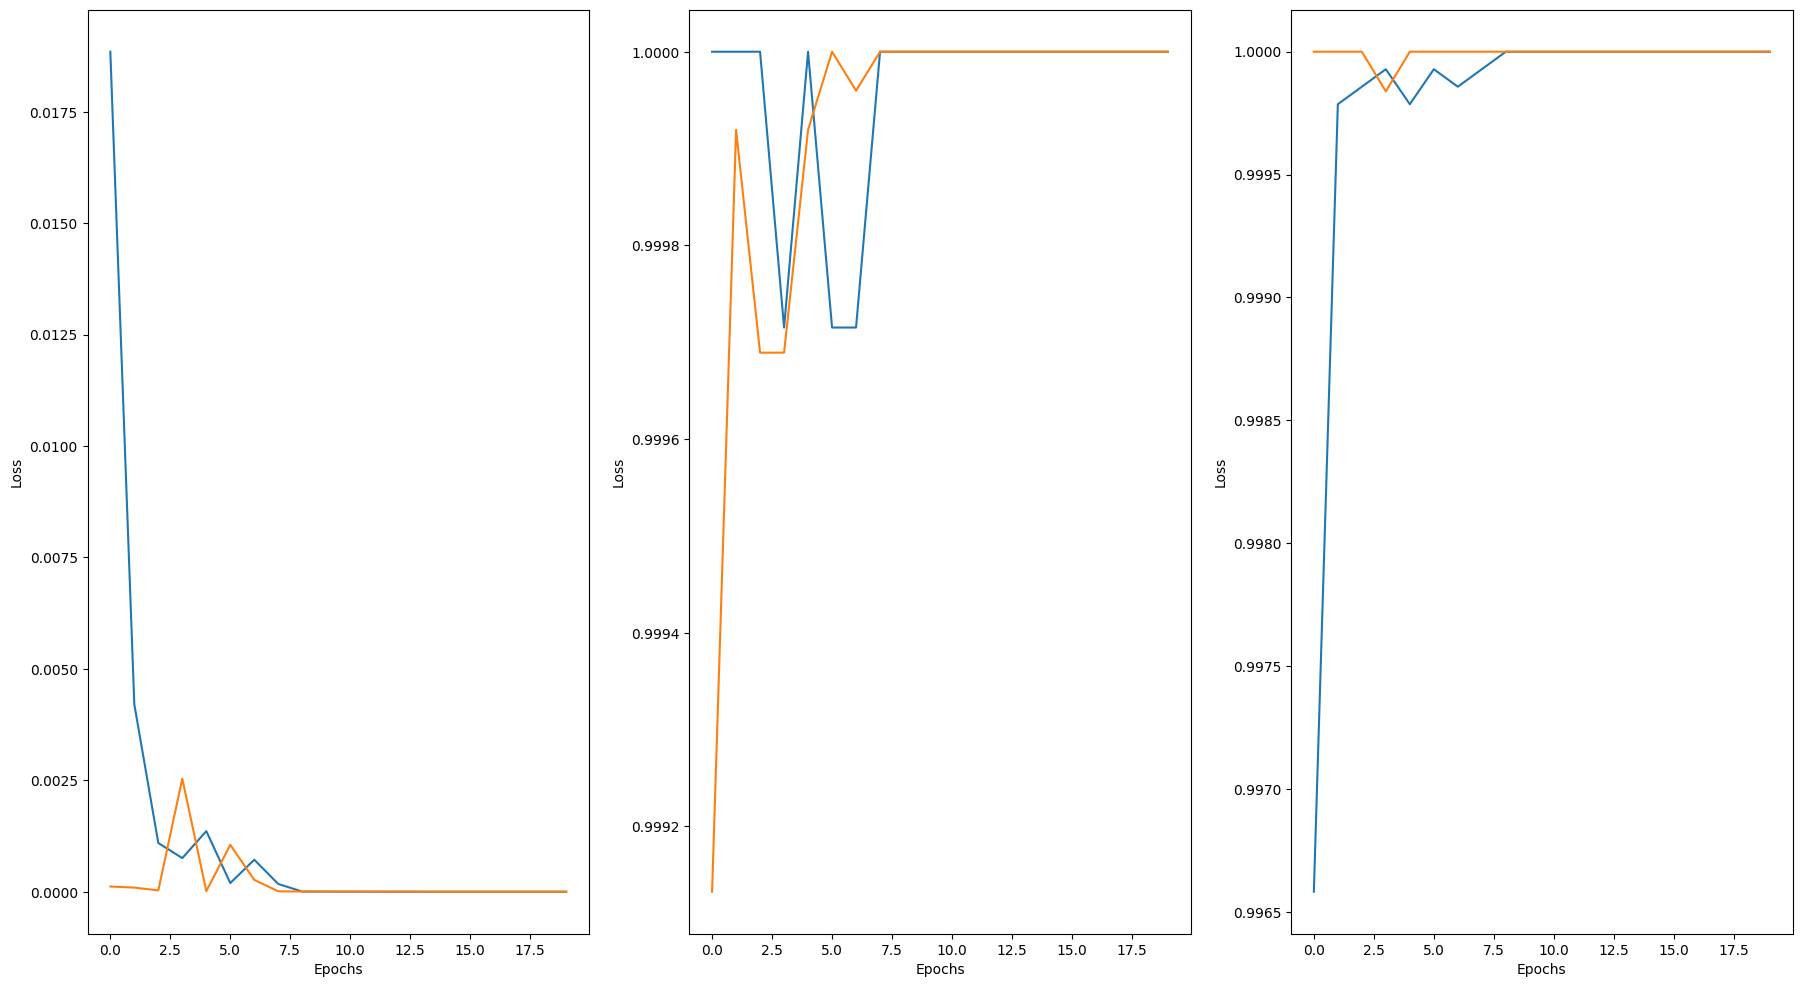

In [184]:
plt.figure(figsize=(22,12))
loss , val_loss = hist.history['loss'] , hist.history['val_loss']
val_auc , auc = hist.history['val_auc'] , hist.history['auc']
val_acc , acc = hist.history['Accuracy'] , hist.history['val_Accuracy']


plt.subplot(1,3,1)
plt.plot(range(epochs), loss)
plt.plot(range(epochs), val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,3,2)
plt.plot(range(epochs), acc)
plt.plot(range(epochs), auc)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,3,3)
plt.plot(range(epochs),val_acc)
plt.plot(range(epochs),val_auc)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [185]:
model.evaluate(x_test, y_test)

183/183 [==============================] - 0s 2ms/step - loss: 2.6227e-04 - Accuracy: 0.9998 - auc: 1.0000


[0.00026227239868603647, 0.999829113483429, 1.0]